In [1]:
import numpy as np
import matplotlib.pyplot as plt

3.125
Accepted rate: 31.81 %


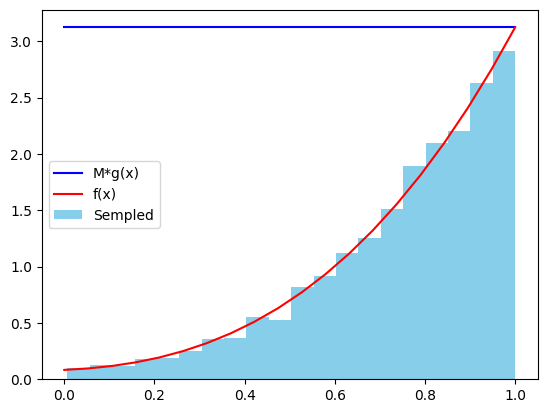

In [7]:
#rejection method를 이용해서 구한 것

def f(x):
    return 3./2.*x**3 + 11./8.*x**2. + 1./6.*x + 1./12.

def g(x):
    return np.ones(np.size(x))

x = np.linspace(0,1,20)
y = f(x)

M = np.max(y)
print(M)

plt.plot(x,M*g(x),label='M*g(x)',color='blue')
plt.plot(x,y,label = 'f(x)', color = 'red')

X = []
n = 10000

for i in range(n):
    xnow = np.random.uniform(0,1) #임의로 추출한 x값에 대해서
    yrand = np.random.uniform(0,M*g(xnow)) #0부터 Max값 사이의 어떠한 값에서 랜덤하게 추출
    if f(xnow) > yrand: #함수에 x를 넣은 값과 0부터 Max값 사이의 어떠한 값에서 랜덤하게 추출됏을 때 비교
        X.append(xnow)

print('Accepted rate:', 100.0*len(X)/n,'%')

plt.hist(X, bins=20, density=1, label='Sempled',color='skyblue')
plt.legend()


Accepted rate: 39.19 %


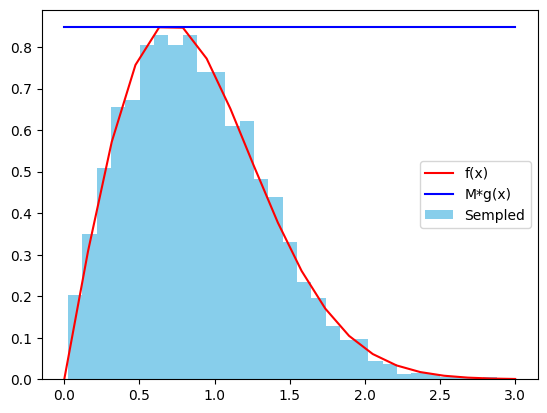

In [13]:
def f(x):
    return 2.0*x*np.exp(-x**2)

def g(x):
    return np.ones(np.size(x))

x = np.linspace(0, 3, 20)
y = f(x)

M = np.max(y)

plt.plot(x,y,label='f(x)',color='red')
plt.plot(x,M*g(x),label='M*g(x)',color='blue')

X = []
n = 10000

for i in range(n):
    xnow = np.random.uniform(0,3) #임의로 추출한 x값에 대해서
    yrand = np.random.uniform(0,M*g(xnow)) #0부터 Max값 사이의 어떠한 값에서 랜덤하게 추출
    if f(xnow) > yrand: #함수에 x를 넣은 값과 0부터 Max값 사이의 어떠한 값에서 랜덤하게 추출됏을 때 비교
        X.append(xnow)

print('Accepted rate:', 100.0*len(X)/n,'%')

plt.hist(X, bins=30, density=1, label='Sempled',color='skyblue')
plt.legend()


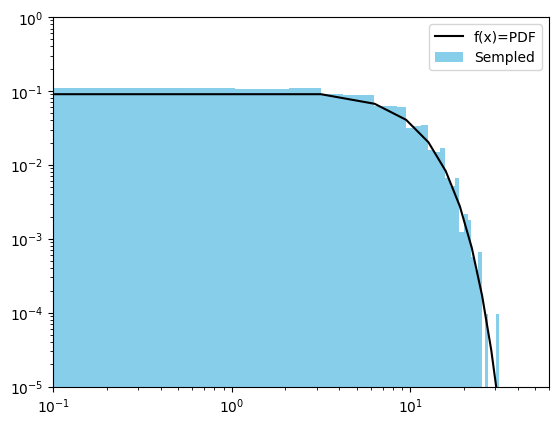

In [17]:
from scipy.integrate import quad

def f(x):
    rc = 10.0
    return 1./rc * np.exp(-x**2/rc**2.0)

#Probability Distribution function(PDF)
n = 20
rmin = 0.0
rmax = 60.0
x = np.linspace(rmin, rmax, n)
y = f(x)

#Cummulative Distribution function(CDF)
ycum = np.zeros(n)
for i in range(n):
    value = quad(f,0.0,x[i])[0]
    ycum[i] = value

plt.loglog(x,y,'-',c='black',label='f(x)=PDF')
plt.ylim(1e-5,1.0)
plt.xlim(1e-1,60.0)
plt.legend()

#Normalizion -> [0,1] 큐뮬레이티브 함수에 대해서 와이축에 따라서 샘플링할 거니까... 와이축이 0에서부터 1까지 되도록
M = np.max(ycum)
ycum = ycum/M

X = []
n = 10000

for i in range(n):
    ynow = np.random.uniform(0,1) #0에서 1까지 normalization 했으니까
    #invers function
    xnow = np.interp(ynow,ycum,x)
    X.append(xnow)

plt.hist(X, bins=30, density=1, label='Sempled',color='skyblue')
plt.legend()

(-15.0, 15.0)

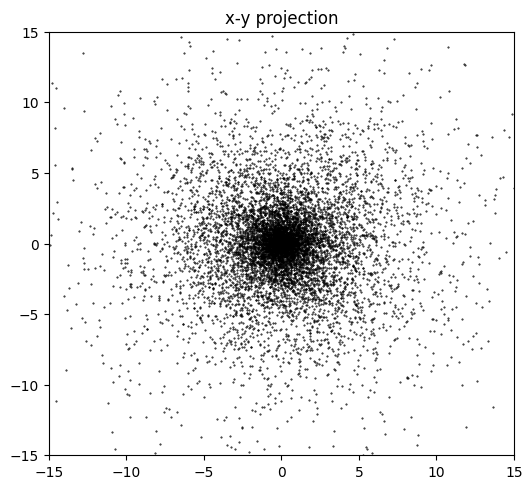

In [20]:
#실제 천문학에서 쓰는 거임 예를 들어 은하나 궐지, 헤일로, 구상성단 같은 것들의 밀도분포 

posx = []
posy = []
for i in range(n):
    phi = np.random.uniform(0,2*np.pi)
    theta = np.random.uniform(0,np.pi)
    posx.append(X[i]*np.sin(theta)*np.cos(phi))
    posy.append(X[i]*np.sin(theta)*np.sin(phi))

plt.figure(figsize=(6,5.5))
plt.scatter(posx,posy,color='black',s=0.2)
plt.title('x-y projection')
plt.xlim(-15,15)
plt.ylim(-15,15)